# **Esquema sobre Gráficos en Python**

Este esquema de Python en Google Colab está pensado para ofrecer una herramienta a aquellos programadores que buscan completar sus casos de uso con gráficos.

# **GRÁFICOS 2D**

En este apartado se mostrarán gráficos en dos dimensiones (2D). En este, se pueden diferenciar entre gráficos 2D estáticos, iterativos y animados.

## **Gráfico de barras**

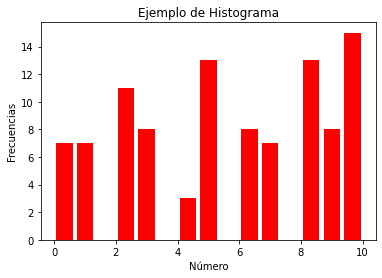

In [ ]:
import random
x=[]
for i in range(100):       
   x.append(random.randint(0, 10))
plt.xlabel("Números")
plt.hist(x, bins = 15, color = "red", rwidth=0.8)
plt.title("Ejemplo de Histograma")
plt.xlabel("Número")
plt.ylabel("Frecuencias")
plt.show()

### **Gráfico de barras iterativo**


In [ ]:
import plotly.graph_objects as gr
fig = gr.Figure(
    data=[gr.Bar(y=[2, 1, 3, 5, 8,3])],
    layout_title_text="Figura hecha con renderizador de colab"
)
fig.show(renderer="colab")

### **Gráfico de barras animado**

In [ ]:
import plotly.express as px

df = px.data.gapminder()

fig = px.bar(df, x="continent", y="pop", color="continent",
  animation_frame="year", animation_group="country", range_y=[0,4000000000])
fig.show()

## **Histograma**

### **Histograma iterativo**



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def plot_function(size = 100, bins = 30, loc=0, scale=1, color='red'):
    data = norm.rvs(size=size, loc=loc, scale=scale)
    binwidth = (max(data) - min(data))/ bins
    plt.hist(data, 
             bins=np.arange(min(data), max(data) + binwidth, binwidth),
             color=color)
    plt.show()
from ipywidgets import interact 
interact(plot_function)
None

interactive(children=(IntSlider(value=100, description='size', max=300, min=-100), IntSlider(value=30, descrip…

## **Gráfico de líneas**

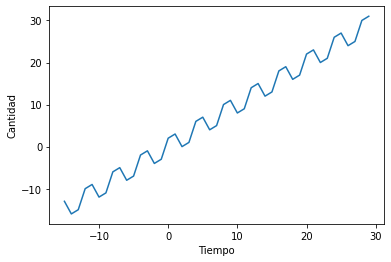

In [ ]:
import matplotlib.pyplot as plt
# Creaos un array aleatorio.
x = range(-15, 30)

# Creamos al array y con los cuadrados de los valores de x.
y = [z^2 for z in x]

# Definimos que arrays vamos a graficar.
plt.plot(x, y)

# Definimos los nombres de los ejes x e y.
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')

# Generamos gráfico.
plt.show()

### **Gráfico de líneas animado**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# Hacer el dibujo, dibujar los ejes y los elementos a animar
fig, ax = plt.subplots()
plt.close()


ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

# Función de inicio
def init():
    line.set_data([], [])
    return (line,)

# Función animada secuencialmente  
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=100, interval=100, blit=True)

# Nota: código que hace que funcione en colab
rc('animation', html='jshtml')
anim

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Scatter(x=[0, 1], y=[0, 1])],
    layout=go.Layout(
        xaxis=dict(range=[0, 5], autorange=False),
        yaxis=dict(range=[0, 5], autorange=False),
        title="Start Title",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    ),
    frames=[go.Frame(data=[go.Scatter(x=[1, 2], y=[1, 2])]),
            go.Frame(data=[go.Scatter(x=[1, 4], y=[1, 4])]),
            go.Frame(data=[go.Scatter(x=[3, 4], y=[3, 5])],
                     layout=go.Layout(title_text="End Title"))]
)

fig.show()

### **Representación de series temporales dinámico** 





In [ ]:
import plotly.graph_objects as go             #HAY QUE CAMBIAR EL DATASET POR UNO NUESTRO (MIENTRAS SEA PROVISIONAL SIRVE).

import pandas as pd

# Cargamos el dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Se inicia la figura
fig = go.Figure()

# Se añaden las líneas

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.High),
               name="High",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.High.mean()] * len(df.index),
               name="High Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Low),
               name="Low",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Low.mean()] * len(df.index),
               name="Low Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Se añaden las anotaciones y los botones
high_annotations = [dict(x="2016-03-01",
                         y=df.High.mean(),
                         xref="x", yref="y",
                         text="High Average:<br> %.2f" % df.High.mean(),
                         ax=0, ay=-40),
                    dict(x=df.High.idxmax(),
                         y=df.High.max(),
                         xref="x", yref="y",
                         text="High Max:<br> %.2f" % df.High.max(),
                         ax=0, ay=-40)]
low_annotations = [dict(x="2015-05-01",
                        y=df.Low.mean(),
                        xref="x", yref="y",
                        text="Low Average:<br> %.2f" % df.Low.mean(),
                        ax=-40, ay=40),
                   dict(x=df.High.idxmin(),
                        y=df.Low.min(),
                        xref="x", yref="y",
                        text="Low Min:<br> %.2f" % df.Low.min(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Ninguno",
                     method="update",
                     args=[{"visible": [True, False, True, False]},
                           {"title": "Yahoo",
                            "annotations": []}]),
                dict(label="Alto",
                     method="update",
                     args=[{"visible": [True, True, False, False]},
                           {"title": "Yahoo High",
                            "annotations": high_annotations}]),
                dict(label="Bajo",
                     method="update",
                     args=[{"visible": [False, False, True, True]},
                           {"title": "Yahoo Low",
                            "annotations": low_annotations}]),
                dict(label="Ambos",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "Yahoo",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Yahoo",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Load data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.Date), y=list(df.High)))

# Set title
fig.update_layout(
    title_text="Serie temporal"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                                dict(count=1,
                     label="1 año",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

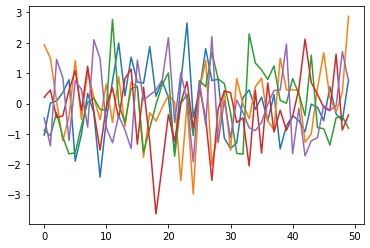

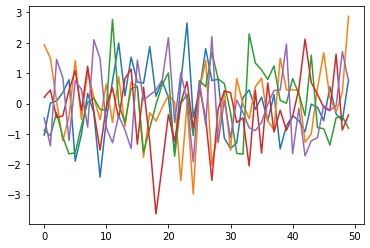

In [ ]:
%matplotlib inline
import time
import pylab as pl
from IPython import display
for i in range(5):
    pl.plot(pl.randn(50))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

## **Heatmap**

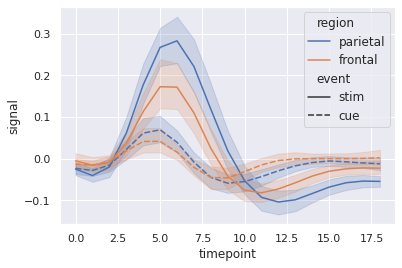

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

# Cargar un ejemplo de dataset con formato de datos largo
fmri = sns.load_dataset("fmri")

# Graficar las diferentes regiones del gráfico
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

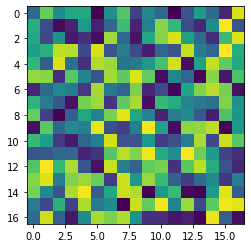

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.random.random((17, 17))
ax.imshow(x)
plt.show()

## **Gráfico X/Y**

### **Gráfico X/Y iterativo**

In [ ]:
import altair as alt
from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

### **Gráfico X/Y animado**

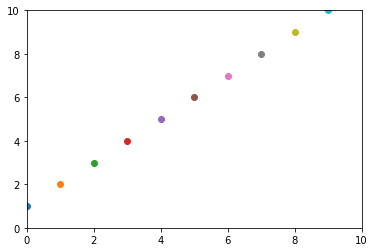

In [ ]:
import matplotlib.pyplot as plt

from IPython import display
from time import sleep

plt.axis([0, 10, 0, 10])
for i in range(10):
    plt.scatter(i, i + 1)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    sleep(0.5)

### **Representación de Clusters**

In [ ]:
import plotly.graph_objects as go

# Generar dataset
import numpy as np
np.random.seed(1)

x0 = np.random.normal(2, 0.4, 400)
y0 = np.random.normal(2, 0.4, 400)
x1 = np.random.normal(3, 0.6, 600)
y1 = np.random.normal(6, 0.4, 400)
x2 = np.random.normal(4, 0.2, 200)
y2 = np.random.normal(4, 0.4, 200)

# Crear figura
fig = go.Figure()

# Añadir traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="DarkOrange")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="Crimson")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="RebeccaPurple")
    )
)

#  Añadir botones y sombras
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="DarkOrange"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="Crimson"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="RebeccaPurple"))]

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="Ninguno",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="Cluster 0",
                     method="relayout",
                     args=["shapes", cluster0]),
                dict(label="Cluster 1",
                     method="relayout",
                     args=["shapes", cluster1]),
                dict(label="Cluster 2",
                     method="relayout",
                     args=["shapes", cluster2]),
                dict(label="Todos",
                     method="relayout",
                     args=["shapes", cluster0 + cluster1 + cluster2])
            ],
        )
    ]
)


fig.update_layout(
    title_text="Clusters",
    showlegend=False,
)

fig.show()

## **Gráfico de burbujas**

### **Gráfico de burbujas iterativo**

In [ ]:
!pip install bokeh
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
N = 500

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 200) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

output_notebook()
p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

### **Gráfico de burbujas animado**

In [ ]:
import plotly.graph_objects as go  #CAMBIAR DATASET (MIENTRAS SEA PROVISIONAL SIRVE)

import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv"
dataset = pd.read_csv(url)

years = ["1952", "1962", "1967", "1972", "1977", "1982", "1987", "1992", "1997", "2002",
         "2007"]

# make list of continents
continents = []
for continent in dataset["continent"]:
    if continent not in continents:
        continents.append(continent)
# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# fill in most of layout
fig_dict["layout"]["xaxis"] = {"range": [30, 85], "title": "Life Expectancy"}
fig_dict["layout"]["yaxis"] = {"title": "GDP per Capita", "type": "log"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Año:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
year = 1952
for continent in continents:
    dataset_by_year = dataset[dataset["year"] == year]
    dataset_by_year_and_cont = dataset_by_year[
        dataset_by_year["continent"] == continent]

    data_dict = {
        "x": list(dataset_by_year_and_cont["lifeExp"]),
        "y": list(dataset_by_year_and_cont["gdpPercap"]),
        "mode": "markers",
        "text": list(dataset_by_year_and_cont["country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 200000,
            "size": list(dataset_by_year_and_cont["pop"])
        },
        "name": continent
    }
    fig_dict["data"].append(data_dict)

# make frames
for year in years:
    frame = {"data": [], "name": str(year)}
    for continent in continents:
        dataset_by_year = dataset[dataset["year"] == int(year)]
        dataset_by_year_and_cont = dataset_by_year[
            dataset_by_year["continent"] == continent]

        data_dict = {
            "x": list(dataset_by_year_and_cont["lifeExp"]),
            "y": list(dataset_by_year_and_cont["gdpPercap"]),
            "mode": "markers",
            "text": list(dataset_by_year_and_cont["country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 200000,
                "size": list(dataset_by_year_and_cont["pop"])
            },
            "name": continent
        }
        frame["data"].append(data_dict)

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [year],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": year,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()

## **Gráfico de Cascada**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = ["Sales", "Consulting", "Net revenue", "Purchases", "Other expenses", "Profit before tax"],
    textposition = "outside",
    text = ["+80", "+90", "", "-50", "-30", "Total"],
    y = [80, 90, 0, -50, -30, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Profit and loss statement 2018",
        showlegend = True
)


### **Gráfico de cascada horizontal**

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "2018", orientation = "h", measure = ["relative", "relative", "relative", "relative", "total", "relative",
                                              "relative", "relative", "relative", "total", "relative", "relative", "total", "relative", "total"],
    y = ["Sales", "Consulting", "Maintenance", "Other revenue", "Net revenue", "Purchases", "Material expenses",
       "Personnel expenses", "Other expenses", "Operating profit", "Investment income", "Financial income",
       "Profit before tax", "Income tax (15%)", "Profit after tax"],
    x = [375, 128, 78, 27, None, -327, -12, -78, -12, None, 32, 89, None, -45, None],
    connector = {"mode":"between", "line":{"width":4, "color":"rgb(0, 0, 0)", "dash":"solid"}}
))

fig.update_layout(title = "Profit and loss statement 2018")

fig.show()

## **Gráfico de Cajas y Bigotes**

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

open_data = [33.0, 33.3, 33.5, 33.0, 34.1]
high_data = [33.1, 33.3, 33.6, 33.2, 34.8]
low_data = [32.7, 32.7, 32.8, 32.6, 32.8]
close_data = [33.0, 32.9, 33.3, 33.1, 33.1]
dates = [datetime(year=2013, month=10, day=10),
         datetime(year=2013, month=11, day=10),
         datetime(year=2013, month=12, day=10),
         datetime(year=2014, month=1, day=10),
         datetime(year=2014, month=2, day=10)]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data)])

fig.show()

## **Gráfico de tarta (Circular)**

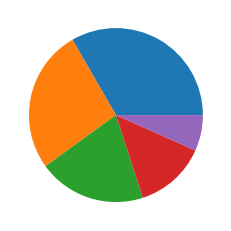

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie([5, 4, 3, 2, 1])
plt.show()

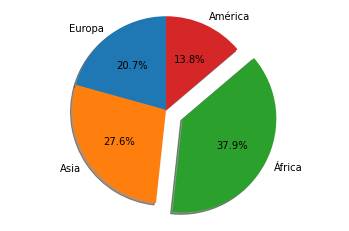

In [ ]:
import matplotlib.pyplot as plt

etiqueta = 'Europa', 'Asia', 'África', 'América'
sizes = [30, 40, 55, 20]
trozo = (0, 0, 0.2, 0)  # para sacar el trozo de tarta

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=trozo, labels=etiqueta, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # para que salga en forma de círculo el gráfico.

plt.show()

## **Gráfico de embudo**

In [ ]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Visitas", "Descargas", "Consumidores", "Precio", "Inversión"],
    x = [30, 26.4, 20.6, 11, 2]))

fig.show()

## **Varios gráficos juntos**

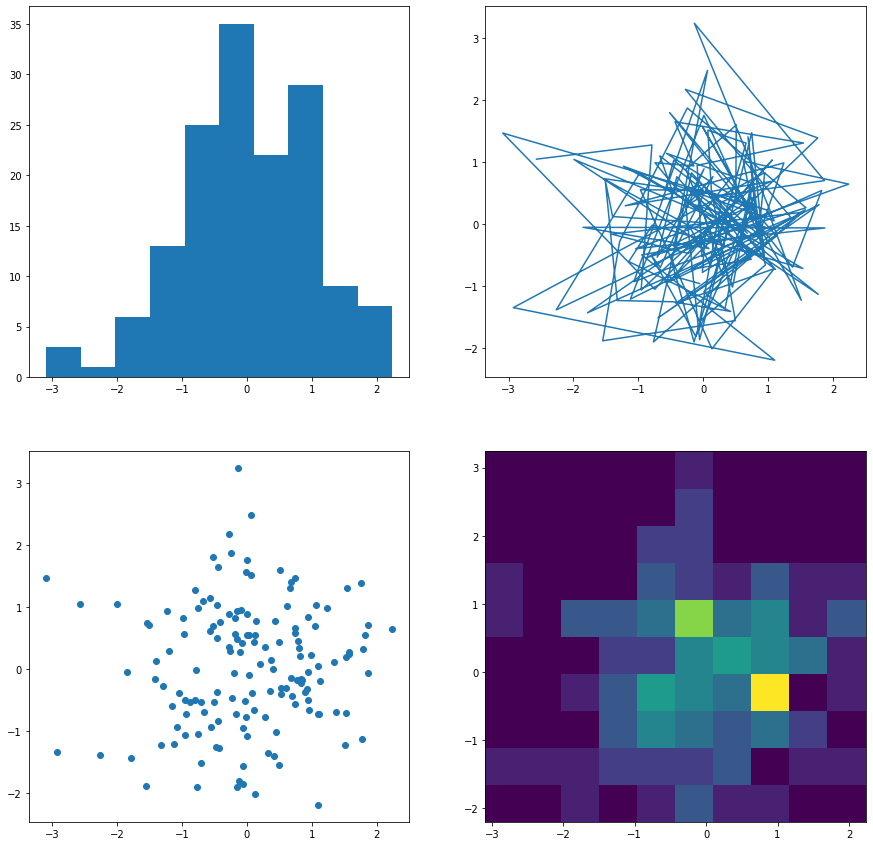

In [ ]:
# Importamos numpy para generar datos de aleatorios 
import numpy as np
import matplotlib.pyplot as plt
# Generamos los datos de prueba aleatoriamente
np.random.seed(167745)
data = np.random.randn(2, 150)

# Creamos un subplot de 2 columnas con 2 filas cada una 
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Agregamos el grafico de histograma en la posicion 0, 0
axs[0, 0].hist(data[0])

# Agregamos un grafico de puntos en la posicion 1, 0
axs[1, 0].scatter(data[0], data[1])

# Agregamos un grafico de lineas en la posicion 0, 1
axs[0, 1].plot(data[0], data[1])

# Agregamos un grafico de histograma 2d en la posicion 1, 1
axs[1, 1].hist2d(data[0], data[1])

# Generamos el grafico.
plt.show()

# **GRÁFICOS 3D**

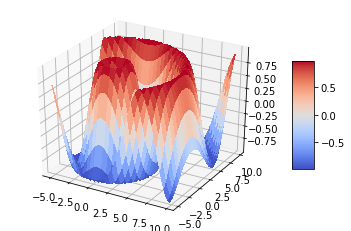

In [2]:
# Importamos Axes3D lo que nos va a permitir graficar en 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Importamos numpy para perar los datos
import numpy as np

# Creamos los datos a graficar
X = np.arange(-5, 10, 0.25)
Y = np.arange(-5, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Preparamos Figure para graficar la superficie.
fig = plt.figure()
ax = fig.gca(projection='3d')

# Definimos plotear X, Y y Z como superficie.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#Agregamos referencia grafica de los valores Opcional.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Generamos el grafico.
plt.show()

## **Gráfico X/Y**

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

## **Figura**

In [ ]:
import plotly.graph_objects as go #¿CAMBIAR DATASET?

import pandas as pd

# Cargar dataset  
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# Cargamos la figura
fig = go.Figure()


fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Cargamos el tamaño de la figura
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Cargamos las opciones 3D
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# menú despegable
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# anotaciones
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ]
)

fig.show()